In [1]:
import sys
sys.path.insert(0, "..")

import matplotlib.pyplot as plt
from algorithms.simplex_algorithms import *
import sympy as sp
import numpy as np
np.set_printoptions(suppress=True, linewidth=np.nan)


Util

In [2]:
def pivoting_symbolic(tableau: np.ndarray, row: int, col: int) -> np.ndarray:
    # escale pivot row min to 1.0
    tableau[row, :] = tableau[row, :] / tableau[row, col]
    # pivot proccess: convert al column to zero except row
    for k in range(tableau.shape[0]):
        if k != row:
            tableau[k, :] = tableau[k, :] - tableau[k, col] * tableau[row, :]


def correct_symbolic_cost(tableau: np.ndarray, basic_var: list[int]) -> None:
    # correct basic variable cost with value distict of zero
    for index, col in enumerate(basic_var):
        row = index + 1
        tableau[0, :] = tableau[0, :] - tableau[0, col] * tableau[row, :]
    print(f"Cost corrected")


Delta range

\begin{aligned}
&\delta_{\min }=\max \left\{\frac{\left(\mathbf{c}_{N I}^{\top}-\mathbf{c}_{B I}^{\top} \mathbf{B}^{-1} \mathbf{N}\right)_{j}}{\left(\mathbf{B}^{-1} \mathbf{N}\right)_{\beta, j}} \mid\left(\mathbf{B}^{-1} \mathbf{N}\right)_{\beta, j}<0, j=1, \ldots, n\right\} \\
&\delta_{\max }=\min \left\{\frac{\left(\mathbf{c}_{N I}^{\top}-\mathbf{c}_{B I}^{\top} \mathbf{B}^{-1} \mathbf{N}\right)_{j}}{\left(\mathbf{B}^{-1} \mathbf{N}\right)_{\beta, j}} \mid\left(\mathbf{B}^{-1} \mathbf{N}\right)_{\beta, j}>0, j=1, \ldots, n\right\}
\end{aligned}

$\delta \in[ \delta_{\min },  \delta_{\max }]$

In [3]:
def delta_range(tableau, non_basic_var, beta):
    # Input: tableau, non-basic columns, j = 1,...,n, and row for division. Page 204
    # Output: range of delta for basic variable perturbed [𝛿_min, 𝛿_max] 
    delta_min = -np.inf
    delta_max = np.Inf
    row = tableau[beta + 1, non_basic_var]
    for i, element in enumerate(row):
        if element > 0:
            delta_min = max(delta_min, tableau[0, non_basic_var[i]] / element)
        if element < 0:
            delta_max = min(delta_max, tableau[0, non_basic_var[i]] / element)
    return [delta_min, delta_max]

In [4]:
delta = sp.symbols("\\delta")

## Linear and Integer Optimization: Chapter 5 Sensibility Analysis

#### Perturbing objetive coefficients 

In [5]:
A = [[1, 1, 1, 0, 0, 0],
     [3, 1, 0, 1, 0, 0],
     [1, 0, 0, 0, 1, 0],
     [0, 1, 0, 0, 0, 1.0]]

b = [9, 18, 7, 6.]

c = lambda delta: [delta + 3., 2., 0., 0., 0., 0]

##### Perturbing the objetive coefficient of a basic variable $x_1$ from óptimal tableau 

$\mathbf v = (4.5, 4.5)$ óptimo

In [6]:
basic_var = [2, 3, 4, 5]

tableau = build_tableau(A, b, c(0))
print("Simplex process")
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(delta)).T
opt_tableau[0, -1] = 0
print("Perturbation")
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
display(sp.nsimplify(opt_tableau, rational=True))


Simplex process
vertex = [ 0.  0.  9. 18.  7.  6.], x_B = [3, 4, 5, 6]
[[ 3.  2.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  9.]
 [ 3.  1.  0.  1.  0.  0. 18.]
 [ 1.  0.  0.  0.  1.  0.  7.]
 [ 0.  1.  0.  0.  0.  1.  6.]]
vertex = [6. 0. 3. 0. 1. 6.], x_B = [3, 1, 5, 6]
[[  0.           1.           0.          -1.           0.           0.         -18.        ]
 [  0.           0.66666667   1.          -0.33333333   0.           0.           3.        ]
 [  1.           0.33333333   0.           0.33333333   0.           0.           6.        ]
 [  0.          -0.33333333   0.          -0.33333333   1.           0.           1.        ]
 [  0.           1.           0.           0.           0.           1.           6.        ]]
vertex = [4.5 4.5 0.  0.  2.5 1.5], x_B = [2, 1, 5, 6]
[[  0.    0.   -1.5  -0.5   0.    0.  -22.5]
 [  0.    1.    1.5  -0.5   0.    0.    4.5]
 [  1.    0.   -0.5   0.5   0.    0.    4.5]
 [  0.    0.    0.5  -0.5   1.    0.    2.5]
 [  0.    0.   -1.

Matrix([
[\delta + 3.0, 2.0,    0,    0,   0,   0,   0],
[           0, 1.0,  1.5, -0.5,   0,   0, 4.5],
[         1.0,   0, -0.5,  0.5,   0,   0, 4.5],
[           0,   0,  0.5, -0.5, 1.0,   0, 2.5],
[           0,   0, -1.5,  0.5,   0, 1.0, 1.5]])

Cost corrected


Matrix([
[0, 0, \delta/2 - 3/2, -\delta/2 - 1/2, 0, 0, -9*\delta/2 - 45/2],
[0, 1,            3/2,            -1/2, 0, 0,                9/2],
[1, 0,           -1/2,             1/2, 0, 0,                9/2],
[0, 0,            1/2,            -1/2, 1, 0,                5/2],
[0, 0,           -3/2,             1/2, 0, 1,                3/2]])

$${(\mathbf c^T_{NI} - (\mathbf c^T_{BI} +\delta \mathbf e_{\beta})B^{-1}N)}_j\le 0 \text { for } j=1,...,n$$

In [7]:
print("Tolerance 1: from tableau corrected")
var = set(range(tableau.shape[1] - 1))
non_basic_var = list(var - set(basic_var))
tol = opt_tableau[0, :].col(non_basic_var)
display(sp.nsimplify(tol))

print("Tolerance 2: apply equation")
c_ = sp.Matrix(c(delta))
B_invN = tableau[1:, non_basic_var]
tol = c_.row(non_basic_var).T - (c_.row(basic_var)).T @ B_invN
sp.nsimplify(tol)


Tolerance 1: from tableau corrected


Matrix([[\delta/2 - 3/2, -\delta/2 - 1/2]])

Tolerance 2: apply equation


Matrix([[\delta/2 - 3/2, -\delta/2 - 1/2]])

Derivative

If $\mathbf c^T_{NI} - \mathbf c^T_{BI} B^{-1}N < \mathbf 0 \text{ (dual solution non degenerate)} \implies \exists f'(0) = {(B^{-1}b)}_\beta$

In [8]:
beta = 1
print(f"f'(0) = {opt_tableau[beta + 1, -1]:0.1f}")

f'(0) = 4.5


$\mathbf v = (3, 6)$ óptimo

In [9]:
basic_var = [2, 3, 4, 5]

tableau = build_tableau(A, b, c(-2))
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
# no necesito desplazar nuevamente :OOOO y me sale la respuesta sin transformar :OOOO
opt_tableau[0, :-1] = sp.Matrix(c(delta)).T
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)


vertex = [ 0.  0.  9. 18.  7.  6.], x_B = [3, 4, 5, 6]
[[ 1.  2.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  9.]
 [ 3.  1.  0.  1.  0.  0. 18.]
 [ 1.  0.  0.  0.  1.  0.  7.]
 [ 0.  1.  0.  0.  0.  1.  6.]]
vertex = [ 0.  6.  3. 12.  7.  0.], x_B = [3, 4, 5, 2]
[[  1.   0.   0.   0.   0.  -2. -12.]
 [  1.   0.   1.   0.   0.  -1.   3.]
 [  3.   0.   0.   1.   0.  -1.  12.]
 [  1.   0.   0.   0.   1.   0.   7.]
 [  0.   1.   0.   0.   0.   1.   6.]]
vertex = [3. 6. 0. 3. 4. 0.], x_B = [1, 4, 5, 2]
[[  0.   0.  -1.   0.   0.  -1. -15.]
 [  1.   0.   1.   0.   0.  -1.   3.]
 [  0.   0.  -3.   1.   0.   2.   3.]
 [  0.   0.  -1.   0.   1.   1.   4.]
 [  0.   1.   0.   0.   0.   1.   6.]]


Matrix([
[\delta + 3.0, 2.0,    0,   0,   0,    0,   0],
[         1.0,   0,  1.0,   0,   0, -1.0, 3.0],
[           0,   0, -3.0, 1.0,   0,  2.0, 3.0],
[           0,   0, -1.0,   0, 1.0,  1.0, 4.0],
[           0, 1.0,    0,   0,   0,  1.0, 6.0]])

Cost corrected


Matrix([
[0, 0, -\delta - 3, 0, 0, \delta + 1, -3*\delta - 21],
[1, 0,           1, 0, 0,         -1,              3],
[0, 0,          -3, 1, 0,          2,              3],
[0, 0,          -1, 0, 1,          1,              4],
[0, 1,           0, 0, 0,          1,              6]])

$\mathbf v = (0, 6)$ óptimo

In [10]:
basic_var = [2, 3, 4, 5]

tableau = build_tableau(A, b, c(-4))
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(delta)).T
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)


vertex = [ 0.  0.  9. 18.  7.  6.], x_B = [3, 4, 5, 6]
[[-1.  2.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  9.]
 [ 3.  1.  0.  1.  0.  0. 18.]
 [ 1.  0.  0.  0.  1.  0.  7.]
 [ 0.  1.  0.  0.  0.  1.  6.]]
vertex = [ 0.  6.  3. 12.  7.  0.], x_B = [3, 4, 5, 2]
[[ -1.   0.   0.   0.   0.  -2. -12.]
 [  1.   0.   1.   0.   0.  -1.   3.]
 [  3.   0.   0.   1.   0.  -1.  12.]
 [  1.   0.   0.   0.   1.   0.   7.]
 [  0.   1.   0.   0.   0.   1.   6.]]


Matrix([
[\delta + 3.0, 2.0,   0,   0,   0,    0,    0],
[         1.0,   0, 1.0,   0,   0, -1.0,  3.0],
[         3.0,   0,   0, 1.0,   0, -1.0, 12.0],
[         1.0,   0,   0,   0, 1.0,    0,  7.0],
[           0, 1.0,   0,   0,   0,  1.0,  6.0]])

Cost corrected


Matrix([
[\delta + 3, 0, 0, 0, 0, -2, -12],
[         1, 0, 1, 0, 0, -1,   3],
[         3, 0, 0, 1, 0, -1,  12],
[         1, 0, 0, 0, 1,  0,   7],
[         0, 1, 0, 0, 0,  1,   6]])

$\mathbf v = (6, 0)$ óptimo

In [11]:
basic_var = [2, 3, 4, 5]

tableau = build_tableau(A, b, c(3))
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(delta)).T 
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)


vertex = [ 0.  0.  9. 18.  7.  6.], x_B = [3, 4, 5, 6]
[[ 6.  2.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  9.]
 [ 3.  1.  0.  1.  0.  0. 18.]
 [ 1.  0.  0.  0.  1.  0.  7.]
 [ 0.  1.  0.  0.  0.  1.  6.]]
vertex = [6. 0. 3. 0. 1. 6.], x_B = [3, 1, 5, 6]
[[  0.           0.           0.          -2.           0.           0.         -36.        ]
 [  0.           0.66666667   1.          -0.33333333   0.           0.           3.        ]
 [  1.           0.33333333   0.           0.33333333   0.           0.           6.        ]
 [  0.          -0.33333333   0.          -0.33333333   1.           0.           1.        ]
 [  0.           1.           0.           0.           0.           1.           6.        ]]


Matrix([
[\delta + 3.0,                2.0,   0,                  0,   0,   0,   0],
[           0,  0.666666666666667, 1.0, -0.333333333333333,   0,   0, 3.0],
[         1.0,  0.333333333333333,   0,  0.333333333333333,   0,   0, 6.0],
[           0, -0.333333333333333,   0, -0.333333333333333, 1.0,   0, 1.0],
[           0,                1.0,   0,                  0,   0, 1.0, 6.0]])

Cost corrected


Matrix([
[0, 1 - \delta/3, 0, -\delta/3 - 1, 0, 0, -6*\delta - 18],
[0,          2/3, 1,          -1/3, 0, 0,              3],
[1,          1/3, 0,           1/3, 0, 0,              6],
[0,         -1/3, 0,          -1/3, 1, 0,              1],
[0,            1, 0,             0, 0, 1,              6]])

Gráfico

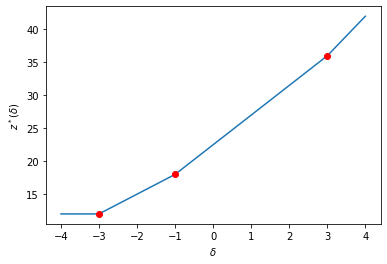

In [12]:
def z(delta):
    if delta < -3:
        return 12
    elif -3 <= delta < -1:
        return 3 * delta + 21
    elif -1 <= delta <= 3:
        return 4.5 * delta + 22.5   # f'(0) = 4.5
    else:
        return 6 * delta + 18

interval_point = [-3, -1, 3]
z_point = [z(d) for d in interval_point]

interval = np.linspace(-4, 4)
z_plot = [z(d) for d in interval]

plt.xlabel("$\delta$")
plt.ylabel("$z^*(\delta)$")
plt.plot(interval, z_plot)
plt.plot(interval_point, z_point, 'o', c='r')
plt.show()


##### Perturbing the objective coefficient of a nonbasic variable

In [13]:
A = [[1, 1, 1, 0, 0, 0],
     [3, 1, 0, 1, 0, 0],
     [1, 0, 0, 0, 1, 0],
     [0, 1, 0, 0, 0, 1.0]]

b = [9, 18, 7, 6.]

c = lambda delta: [6, 1 + delta, 0, 0, 0., 0]

In [14]:
tableau = build_tableau(A, b, c(0))
basic_var = [2, 3, 4, 5]
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(delta)).T
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)


vertex = [ 0.  0.  9. 18.  7.  6.], x_B = [3, 4, 5, 6]
[[ 6.  1.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  9.]
 [ 3.  1.  0.  1.  0.  0. 18.]
 [ 1.  0.  0.  0.  1.  0.  7.]
 [ 0.  1.  0.  0.  0.  1.  6.]]
vertex = [6. 0. 3. 0. 1. 6.], x_B = [3, 1, 5, 6]
[[  0.          -1.           0.          -2.           0.           0.         -36.        ]
 [  0.           0.66666667   1.          -0.33333333   0.           0.           3.        ]
 [  1.           0.33333333   0.           0.33333333   0.           0.           6.        ]
 [  0.          -0.33333333   0.          -0.33333333   1.           0.           1.        ]
 [  0.           1.           0.           0.           0.           1.           6.        ]]


Matrix([
[  6,         \delta + 1,   0,                  0,   0,   0,   0],
[  0,  0.666666666666667, 1.0, -0.333333333333333,   0,   0, 3.0],
[1.0,  0.333333333333333,   0,  0.333333333333333,   0,   0, 6.0],
[  0, -0.333333333333333,   0, -0.333333333333333, 1.0,   0, 1.0],
[  0,                1.0,   0,                  0,   0, 1.0, 6.0]])

Cost corrected


Matrix([
[0, \delta - 1, 0,   -2, 0, 0, -36],
[0,        2/3, 1, -1/3, 0, 0,   3],
[1,        1/3, 0,  1/3, 0, 0,   6],
[0,       -1/3, 0, -1/3, 1, 0,   1],
[0,          1, 0,    0, 0, 1,   6]])

Interval of tolerance $\delta \le 1$. The objective value does not change as long as $\delta \le 1$, because we have perturbed an objetive coefficient of a nonbasic variable (which has value zero).

Dual mode

$x^*_k$ has been perturbed and his dual complement is $y^*_{m+k}$, where $k=2$ y $m=4$, both obtained from the primary model.

In [15]:
A_T = np.array([[-1., -3., -1., -0., 1, 0],
                [-1., -1., -0., -1., 0, 1]])

b = [-9, -18, -7, -6., 0, 0]

c = [-6, -1.0]

tableau = build_tableau(A_T, c, b)
basic_var = [2, 3]

dual_simplex(tableau, basic_var);


vertex = [ 0.  0. -6. -1.  0.  0.], x_B = [3, 4]
[[ -9. -18.  -7.  -6.   0.   0.   0.]
 [ -1.  -3.  -1.  -0.   1.   0.  -6.]
 [ -1.  -1.  -0.  -1.   0.   1.  -1.]]
vertex = [0. 2. 0. 1. 0. 0.], x_B = [2, 4]
[[-3.          0.         -1.         -6.         -6.          0.         36.        ]
 [ 0.33333333  1.          0.33333333  0.         -0.33333333 -0.          2.        ]
 [-0.66666667  0.          0.33333333 -1.         -0.33333333  1.          1.        ]]


Then $\delta \le y^*_{m+k} = 1$, obtained from optimal dual simplex table. 

##### Determining tolerance intervals from an optimal simplex tableau

In [16]:
# For basic variable
A = [[1, 1, 1, 0, 0, 0],
     [3, 1, 0, 1, 0, 0],
     [1, 0, 0, 0, 1, 0],
     [0, 1, 0, 0, 0, 1.0]]

b = [9, 18, 7, 6.]

c = lambda delta: [delta + 3., 2., 0., 0., 0., 0]

tableau = build_tableau(A, b, c(0))
basic_var = [2, 3, 4, 5]
simplex(tableau, basic_var)
var = set(range(tableau.shape[1] - 1))
non_basic_var = list(var - set(basic_var))
# location of perturbed basic variable in array [5, 2, k, ..., 1], beta=2
beta = 1  # [1, 0, 4, 5]
k = basic_var.index(beta)
print("[𝛿_min, 𝛿_max] =", delta_range(tableau, non_basic_var, beta))


vertex = [ 0.  0.  9. 18.  7.  6.], x_B = [3, 4, 5, 6]
[[ 3.  2.  0.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  0.  9.]
 [ 3.  1.  0.  1.  0.  0. 18.]
 [ 1.  0.  0.  0.  1.  0.  7.]
 [ 0.  1.  0.  0.  0.  1.  6.]]
vertex = [6. 0. 3. 0. 1. 6.], x_B = [3, 1, 5, 6]
[[  0.           1.           0.          -1.           0.           0.         -18.        ]
 [  0.           0.66666667   1.          -0.33333333   0.           0.           3.        ]
 [  1.           0.33333333   0.           0.33333333   0.           0.           6.        ]
 [  0.          -0.33333333   0.          -0.33333333   1.           0.           1.        ]
 [  0.           1.           0.           0.           0.           1.           6.        ]]
vertex = [4.5 4.5 0.  0.  2.5 1.5], x_B = [2, 1, 5, 6]
[[  0.    0.   -1.5  -0.5   0.    0.  -22.5]
 [  0.    1.    1.5  -0.5   0.    0.    4.5]
 [  1.    0.   -0.5   0.5   0.    0.    4.5]
 [  0.    0.    0.5  -0.5   1.    0.    2.5]
 [  0.    0.   -1.5   0.5   0.    

#### Sensibility analysis for the degenerate case

d) Unique and degenerate optimal solution $\implies$ Multiple optimal solution


In [17]:
# Primal
A = [[1, -1, 1, 1, 0],
     [1, 0., 0, 0, 1]]

b = [1, 1.0]

c = [1, -1.0, 0, 0, 0]
basic_var = [3, 4]
tableau = build_tableau(A, b, c)
simplex(tableau, basic_var);
print("The primal model has the unique optimal solution [1, 0, 0, 0, 0]")


vertex = [0. 0. 0. 1. 1.], x_B = [4, 5]
[[ 1. -1.  0.  0.  0.  0.]
 [ 1. -1.  1.  1.  0.  1.]
 [ 1.  0.  0.  0.  1.  1.]]
vertex = [1. 0. 0. 0. 0.], x_B = [1, 5]
[[ 0.  0. -1. -1.  0. -1.]
 [ 1. -1.  1.  1.  0.  1.]
 [ 0.  1. -1. -1.  1.  0.]]
The primal model has the unique optimal solution [1, 0, 0, 0, 0]


#### Exercise 5.8.1. Consider the following LO-model.


\begin{align*}
\max (1 + \delta)x_1 + &x_2\\ 
\text{s.t.}\quad \quad \quad\quad \quad &x_2 \le 5\\
            2x_1 + &x_2 \le 8\\
            3x_1 + &x_2 \le 10\\
            x_1\ge 0, &x_2\ge 0
\end{align*}

In [18]:
A = [[0, 1., 1, 0, 0],
     [2, 1., 0, 1, 0],
     [3, 1., 0, 0, 1]]

b = [5, 8, 10.]

c = lambda delta: [1 + delta, 1, 0, 0, 0]


$\mathbf v = [1.5, 5]$ óptimo

In [19]:
basic_var = [2, 3, 4]

tableau = build_tableau(A, b, c(0))
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(delta)).T
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)

vertex = [ 0.  0.  5.  8. 10.], x_B = [3, 4, 5]
[[ 1.  1.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  5.]
 [ 2.  1.  0.  1.  0.  8.]
 [ 3.  1.  0.  0.  1. 10.]]
vertex = [3.33333333 0.         5.         1.33333333 0.        ], x_B = [3, 4, 1]
[[ 0.          0.66666667  0.          0.         -0.33333333 -3.33333333]
 [ 0.          1.          1.          0.          0.          5.        ]
 [ 0.          0.33333333  0.          1.         -0.66666667  1.33333333]
 [ 1.          0.33333333  0.          0.          0.33333333  3.33333333]]
vertex = [2. 4. 1. 0. 0.], x_B = [3, 2, 1]
[[ 0.  0.  0. -2.  1. -6.]
 [ 0.  0.  1. -3.  2.  1.]
 [ 0.  1.  0.  3. -2.  4.]
 [ 1.  0.  0. -1.  1.  2.]]
vertex = [1.5 5.  0.  0.  0.5], x_B = [5, 2, 1]
[[ 0.   0.  -0.5 -0.5  0.  -6.5]
 [ 0.   0.   0.5 -1.5  1.   0.5]
 [ 0.   1.   1.   0.   0.   5. ]
 [ 1.   0.  -0.5  0.5  0.   1.5]]


Matrix([
[\delta + 1,   1,    0,    0,   0,                 0],
[         0,   0,  0.5, -1.5, 1.0, 0.500000000000001],
[         0, 1.0,  1.0,    0,   0,               5.0],
[       1.0,   0, -0.5,  0.5,   0,               1.5]])

Cost corrected


Matrix([
[0, 0, \delta/2 - 1/2, -\delta/2 - 1/2, 0, -3*\delta/2 - 13/2],
[0, 0,            1/2,            -3/2, 1,                1/2],
[0, 1,              1,               0, 0,                  5],
[1, 0,           -1/2,             1/2, 0,                3/2]])

$\mathbf v = [0, 5]$ óptimo

In [20]:
basic_var = [2, 3, 4]

tableau = build_tableau(A, b, c(-1))
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(delta - 1)).T
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)

vertex = [ 0.  0.  5.  8. 10.], x_B = [3, 4, 5]
[[ 0.  1.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  5.]
 [ 2.  1.  0.  1.  0.  8.]
 [ 3.  1.  0.  0.  1. 10.]]
vertex = [0. 5. 0. 3. 5.], x_B = [2, 4, 5]
[[ 0.  0. -1.  0.  0. -5.]
 [ 0.  1.  1.  0.  0.  5.]
 [ 2.  0. -1.  1.  0.  3.]
 [ 3.  0. -1.  0.  1.  5.]]


Matrix([
[\delta,   1,    0,   0,   0,   0],
[     0, 1.0,  1.0,   0,   0, 5.0],
[   2.0,   0, -1.0, 1.0,   0, 3.0],
[   3.0,   0, -1.0,   0, 1.0, 5.0]])

Cost corrected


Matrix([
[\delta, 0, -1, 0, 0, -5],
[     0, 1,  1, 0, 0,  5],
[     2, 0, -1, 1, 0,  3],
[     3, 0, -1, 0, 1,  5]])

$\mathbf v = [2, 4]$ óptimo

In [21]:
basic_var = [2, 3, 4]

tableau = build_tableau(A, b, c(1))
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(delta + 1)).T
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
opt_tableau

vertex = [ 0.  0.  5.  8. 10.], x_B = [3, 4, 5]
[[ 2.  1.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  5.]
 [ 2.  1.  0.  1.  0.  8.]
 [ 3.  1.  0.  0.  1. 10.]]
vertex = [3.33333333 0.         5.         1.33333333 0.        ], x_B = [3, 4, 1]
[[ 0.          0.33333333  0.          0.         -0.66666667 -6.66666667]
 [ 0.          1.          1.          0.          0.          5.        ]
 [ 0.          0.33333333  0.          1.         -0.66666667  1.33333333]
 [ 1.          0.33333333  0.          0.          0.33333333  3.33333333]]
vertex = [2. 4. 1. 0. 0.], x_B = [3, 2, 1]
[[ 0.  0.  0. -1.  0. -8.]
 [ 0.  0.  1. -3.  2.  1.]
 [ 0.  1.  0.  3. -2.  4.]
 [ 1.  0.  0. -1.  1.  2.]]


Matrix([
[\delta + 2,   1,   0,    0,    0,   0],
[         0,   0, 1.0, -3.0,  2.0, 1.0],
[         0, 1.0,   0,  3.0, -2.0, 4.0],
[       1.0,   0,   0, -1.0,  1.0, 2.0]])

Cost corrected


Matrix([
[  0,   0,   0, 1.0*\delta - 1.0, 2.22044604925031e-16 - 1.0*\delta, -2.0*\delta - 8.0],
[  0,   0, 1.0,             -3.0,                               2.0,               1.0],
[  0, 1.0,   0,              3.0,                              -2.0,               4.0],
[1.0,   0,   0,             -1.0,                               1.0,               2.0]])

$\mathbf v = \left(\frac{10}{3}, 0\right)$ óptimo

In [22]:
basic_var = [2, 3, 4]

tableau = build_tableau(A, b, c(2))
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(delta + 2)).T
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)

vertex = [ 0.  0.  5.  8. 10.], x_B = [3, 4, 5]
[[ 3.  1.  0.  0.  0.  0.]
 [ 0.  1.  1.  0.  0.  5.]
 [ 2.  1.  0.  1.  0.  8.]
 [ 3.  1.  0.  0.  1. 10.]]
vertex = [3.33333333 0.         5.         1.33333333 0.        ], x_B = [3, 4, 1]
[[  0.           0.           0.           0.          -1.         -10.        ]
 [  0.           1.           1.           0.           0.           5.        ]
 [  0.           0.33333333   0.           1.          -0.66666667   1.33333333]
 [  1.           0.33333333   0.           0.           0.33333333   3.33333333]]


Matrix([
[\delta + 3,                 1,   0,   0,                  0,                0],
[         0,               1.0, 1.0,   0,                  0,              5.0],
[         0, 0.333333333333333,   0, 1.0, -0.666666666666667, 1.33333333333333],
[       1.0, 0.333333333333333,   0,   0,  0.333333333333333, 3.33333333333333]])

Cost corrected


Matrix([
[0, -\delta/3, 0, 0, -\delta/3 - 1, -10*\delta/3 - 10],
[0,         1, 1, 0,             0,                 5],
[0,       1/3, 0, 1,          -2/3,               4/3],
[1,       1/3, 0, 0,           1/3,              10/3]])

Gráfico

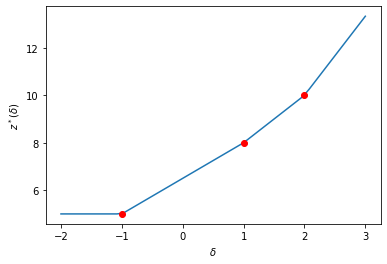

In [23]:
def z(delta):
    if delta < -1:
        return 5
    elif -1 <= delta < 1:
        return (3 * delta + 13) / 2
    elif 1 <= delta < 2:
        return 2 * delta + 6
    else:
        return 10 / 3 * (delta + 1)


interval_point = [-1, 1, 2]
z_point = [z(d) for d in interval_point]

interval = np.linspace(-2, 3)
z_plot = [z(d) for d in interval]

plt.xlabel("$\delta$")
plt.ylabel("$z^*(\delta)$")
plt.plot(interval, z_plot)
plt.plot(interval_point, z_point, 'o', c='r')
plt.show()

#### Exercise 5.8.10. Consider the following LO-model.

\begin{align*}
    \max\quad 3x_1& +& 4x_2& -& 2x_3& +& x_4& -& x_5&\\
    \text{s.t.}\quad   4x_1& +& 5x_2&  -& x_3& -& x_4& -& x_5 \le 30\\
                        x_1& +&  x_2&  +& x_3& +& x_4& +& x_5 \le 15\\
                        x_1& {}&  {}&  +& 3x_3&  +& 3x_4& {}&  \le 27\\
                         {}& {}& x_2&  {}&  {}&  +&  2x_4& {}& \le 20\\
                        x_1& {}&  {}&  +&  3x_3&  {}& {}&  {}& \ge 20\\
\end{align*}
$$x_1, x_2, x_3, x_4, x_5 \ge 0$$


(a) Determine optimal primal and dual solutions. Draw and analyze the perturbation function for the objective coeficient of $x_4$
.

In [24]:
A = [[4, 5, -1, -1, -1, 1, 0, 0, 0, 0., 0],
     [1, 1, 1., 1., 1., 0, 1, 0, 0, 0., 0],
     [1, 0, 3., 3., 0., 0, 0, 1, 0, 0., 0],
     [0, 1, 0., 2., 0., 0, 0, 0, 1, 0., 0],
     [1, 0, 3., 0., 0., 0, 0, 0, 0, -1, 1]]

b = [30, 15, 27, 20, 20.]

c = lambda delta: [3, 4, -2, 1 + delta, -1, 0., 0., 0, 0, 0]
c_artificial = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1]


In [25]:
tableau = build_tableau(A, b, c_artificial)
basic_var = [5, 6, 7, 8, 10]
artificial_val = [10]
print("Simplex process")
opt_tableau = two_phases(tableau, c(0), basic_var, artificial_val)
opt_tableau = sp.Matrix(opt_tableau.tolist())
print("Perturbation")
opt_tableau[0, :-1] = sp.Matrix(c(delta)).T
opt_tableau[0, -1] = 0
display(opt_tableau)
correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)

Simplex process
x_B = [6, 7, 8, 9, 11]
[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.]
 [ 4.  5. -1. -1. -1.  1.  0.  0.  0.  0.  0. 30.]
 [ 1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  0. 15.]
 [ 1.  0.  3.  3.  0.  0.  0.  1.  0.  0.  0. 27.]
 [ 0.  1.  0.  2.  0.  0.  0.  0.  1.  0.  0. 20.]
 [ 1.  0.  3.  0.  0.  0.  0.  0.  0. -1.  1. 20.]]
Cost corrected
x_B = [6, 7, 8, 9, 11]
[[ 1.  0.  3.  0.  0.  0.  0.  0.  0. -1.  0. 20.]
 [ 4.  5. -1. -1. -1.  1.  0.  0.  0.  0.  0. 30.]
 [ 1.  1.  1.  1.  1.  0.  1.  0.  0.  0.  0. 15.]
 [ 1.  0.  3.  3.  0.  0.  0.  1.  0.  0.  0. 27.]
 [ 0.  1.  0.  2.  0.  0.  0.  0.  1.  0.  0. 20.]
 [ 1.  0.  3.  0.  0.  0.  0.  0.  0. -1.  1. 20.]]
Start phase One
x_B = [6, 7, 8, 9, 3]
[[ 0.          0.          0.          0.          0.          0.          0.          0.          0.          0.         -1.          0.        ]
 [ 4.33333333  5.          0.         -1.         -1.          1.          0.          0.          0.         -0.33333333  0

Matrix([
[  3,    4,  -2, \delta + 1,   -1,                   0,                   0,   0,   0,                  0,                    0],
[1.0,  1.2,   0,          0,    0,                 0.2,                 0.2,   0,   0,                  0,                  9.0],
[  0,  0.2,   0,        1.0,  1.0,  -0.133333333333333,   0.866666666666667,   0,   0,  0.333333333333333,     2.33333333333333],
[  0, -0.6,   0,          0, -3.0,                 0.4,                -2.6, 1.0,   0,                  0, 4.44089209850063e-15],
[  0,  0.6,   0,          0, -2.0,   0.266666666666667,   -1.73333333333333,   0, 1.0, -0.666666666666667,     15.3333333333333],
[  0, -0.4, 1.0,          0,    0, -0.0666666666666667, -0.0666666666666667,   0,   0, -0.333333333333333,     3.66666666666667]])

Cost corrected


Matrix([
[0, -\delta/5 - 3/5, 0, 0, -\delta - 2, 2*\delta/15 - 3/5, -13*\delta/15 - 8/5, 0, 0, -\delta/3 - 1,                               -7*\delta/3 - 22],
[1,             6/5, 0, 0,           0,               1/5,                 1/5, 0, 0,             0,                                              9],
[0,             1/5, 0, 1,           1,             -2/15,               13/15, 0, 0,           1/3,                                            7/3],
[0,            -3/5, 0, 0,          -3,               2/5,               -13/5, 1, 0,             0, 444089209850063/100000000000000000000000000000],
[0,             3/5, 0, 0,          -2,              4/15,              -26/15, 0, 1,          -2/3,                                           46/3],
[0,            -2/5, 1, 0,           0,             -1/15,               -1/15, 0, 0,          -1/3,                                           11/3]])

In [26]:
# Dual
A_T = np.array([[-4., -1, -1., -0., 1., 1, 0, 0, 0, 0],
                [-5., -1, -0, -1., -0., 0, 1, 0, 0, 0],
                [1., -1., -3., -0., 3., 0, 0, 1, 0, 0],
                [1., -1., -3, -2., -0., 0, 0, 0, 1, 0],
                [1., -1., -0, -0., -0., 0, 0, 0, 0, 1]])

b = -np.array([30, 15, 27, 20, -20., 0, 0, 0, 0, 0])

c = np.array([-3, -4, 2, -1, 1.])

basic_var = [5, 6, 7, 8, 9]
# tableau = dual_simplex(tableau, basic_var)
tableau = build_tableau(A_T, c, b)
# simplex o dual_simplex = dual_simplex o simplex???
tableau = simplex(tableau, basic_var);
tableau = dual_simplex(tableau, basic_var)

vertex = [ 0.  0.  0.  0.  0. -3. -4.  2. -1.  1.], x_B = [6, 7, 8, 9, 10]
[[-30. -15. -27. -20.  20.  -0.  -0.  -0.  -0.  -0.   0.]
 [ -4.  -1.  -1.  -0.   1.   1.   0.   0.   0.   0.  -3.]
 [ -5.  -1.   0.  -1.  -0.   0.   1.   0.   0.   0.  -4.]
 [  1.  -1.  -3.  -0.   3.   0.   0.   1.   0.   0.   2.]
 [  1.  -1.  -3.  -2.  -0.   0.   0.   0.   1.   0.  -1.]
 [  1.  -1.   0.  -0.  -0.   0.   0.   0.   0.   1.   1.]]
vertex = [ 0.  0.  0.  0. -3.  0. -4. 11. -1.  1.], x_B = [5, 7, 8, 9, 10]
[[ 50.   5.  -7. -20.   0. -20.  -0.  -0.  -0.  -0.  60.]
 [ -4.  -1.  -1.  -0.   1.   1.   0.   0.   0.   0.  -3.]
 [ -5.  -1.   0.  -1.  -0.   0.   1.   0.   0.   0.  -4.]
 [ 13.   2.   0.   0.   0.  -3.   0.   1.   0.   0.  11.]
 [  1.  -1.  -3.  -2.  -0.   0.   0.   0.   1.   0.  -1.]
 [  1.  -1.   0.  -0.  -0.   0.   0.   0.   0.   1.   1.]]
vertex = [-1.  0.  0.  0. -7.  0. -9. 24.  0.  2.], x_B = [5, 7, 8, 1, 10]
[[  0.  55. 143.  80.   0. -20.  -0.  -0. -50.  -0. 110.]
 [  0.  -5. -13.  -

#### Exercise 5.8.7. Use Theorem 5.6.1 to determine whether the following models have a unique optimal solution or multiple optimal solutions, and whether these solutions are degenerate or nondegenerate. (Hint: solve the dual models.)

#### (a) 

In [52]:
A = [[-0.5, 1., -1, 0, 0, 1],
     [-2.0, 1., 0, 1, 0, 0],
     [1.0, 1.0, 0, 0, 1, 0]]

b = [4, 5, 8.]

c_artificial = [0, 0, 0, 0, 0, -1]
c = [1, 1.]

tableau = build_tableau(A, b, c_artificial)
basic_indices = [5, 3, 4]
artificial_indices = [5]
tableau = two_phases(tableau, c, basic_indices, artificial_indices)

x_B = [6, 4, 5]
[[ 0.   0.   0.   0.   0.  -1.   0. ]
 [-0.5  1.  -1.   0.   0.   1.   4. ]
 [-2.   1.   0.   1.   0.   0.   5. ]
 [ 1.   1.   0.   0.   1.   0.   8. ]]
Cost corrected
x_B = [6, 4, 5]
[[-0.5  1.  -1.   0.   0.   0.   4. ]
 [-0.5  1.  -1.   0.   0.   1.   4. ]
 [-2.   1.   0.   1.   0.   0.   5. ]
 [ 1.   1.   0.   0.   1.   0.   8. ]]
Start phase One
x_B = [2, 4, 5]
[[ 0.   0.   0.   0.   0.  -1.   0. ]
 [-0.5  1.  -1.   0.   0.   1.   4. ]
 [-1.5  0.   1.   1.   0.  -1.   1. ]
 [ 1.5  0.   1.   0.   1.  -1.   4. ]]
Delete artificial variables and create a new tableau [5]
Start phase two, put original cost
x_B = [2, 4, 5]
[[ 1.   1.   0.   0.   0.   0. ]
 [-0.5  1.  -1.   0.   0.   4. ]
 [-1.5  0.   1.   1.   0.   1. ]
 [ 1.5  0.   1.   0.   1.   4. ]]
Cost corrected
vertex = [0. 4. 0. 1. 4.], x_B = [2, 4, 5]
[[ 1.5  0.   1.   0.   0.  -4. ]
 [-0.5  1.  -1.   0.   0.   4. ]
 [-1.5  0.   1.   1.   0.   1. ]
 [ 1.5  0.   1.   0.   1.   4. ]]
vertex = [2.66666667 5.3333333

Dado que tiene un costo no básico 0 el modelo tiene múltiples soluciones  tal y como se vé en el gráfico corresponde al segmento de recta formado por los puntos $A$ y $B$. Además son no degeneradas.


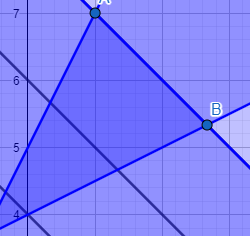

In [53]:
# cambiando de punto
tableau2 = tableau.copy()
print(tableau2)
pivoting(tableau2, 2, 2)
print(tableau2)


[[ 0.          0.          0.          0.         -1.         -8.        ]
 [ 0.          1.         -0.66666667  0.          0.33333333  5.33333333]
 [ 0.          0.          2.          1.          1.          5.        ]
 [ 1.          0.          0.66666667  0.          0.66666667  2.66666667]]
[[ 0.          0.          0.          0.         -1.         -8.        ]
 [ 0.          1.          0.          0.33333333  0.66666667  7.        ]
 [ 0.          0.          1.          0.5         0.5         2.5       ]
 [ 1.          0.          0.         -0.33333333  0.33333333  1.        ]]


Dual

In [73]:
A_dual = [[0.5, -2, 1, -1, 0],
          [-1., 1., 1, 0, -1]]
b_dual = [1, 1.]
c_dual = [4, -5, -8, 0, 0]  # -c

tableau = build_tableau(A_dual, b_dual, c_dual)
print(tableau)
basic_indices = [2, 3]
correct_all_tableau(tableau, basic_indices)
print(tableau)
simplex(tableau, basic_indices);

[[ 4.  -5.  -8.   0.   0.   0. ]
 [ 0.5 -2.   1.  -1.   0.   1. ]
 [-1.   1.   1.   0.  -1.   1. ]]
All tableau corrected
[[-4.   3.   0.   0.  -8.   8. ]
 [-1.   1.   1.   0.  -1.   1. ]
 [-1.5  3.   0.   1.  -1.   0. ]]
vertex = [0. 0. 1. 0. 0.], x_B = [3, 4]
[[-4.   3.   0.   0.  -8.   8. ]
 [-1.   1.   1.   0.  -1.   1. ]
 [-1.5  3.   0.   1.  -1.   0. ]]
vertex = [0. 0. 1. 0. 0.], x_B = [3, 2]
[[-2.5         0.          0.         -1.         -7.          8.        ]
 [-0.5         0.          1.         -0.33333333 -0.66666667  1.        ]
 [-0.5         1.          0.          0.33333333 -0.33333333  0.        ]]


Única solución óptima degenerada.

Estamos en el caso (c) del teorema 5.6.1

#### (b)

In [76]:
A = [[1.0, 2, 1, 0, 0],
     [1/3, 1, 0, 1, 0],
     [2.0, 1, 0, 0, 1]]

b = [11, 3., 10]

c = [0, 1., 0, 0, 0]
basic_indices = [2, 3, 4]
tableau = build_tableau(A, b, c)
simplex(tableau, basic_indices);

vertex = [ 0.  0. 11.  3. 10.], x_B = [3, 4, 5]
[[ 0.          1.          0.          0.          0.          0.        ]
 [ 1.          2.          1.          0.          0.         11.        ]
 [ 0.33333333  1.          0.          1.          0.          3.        ]
 [ 2.          1.          0.          0.          1.         10.        ]]
vertex = [0. 3. 5. 0. 7.], x_B = [3, 2, 5]
[[-0.33333333  0.          0.         -1.          0.         -3.        ]
 [ 0.33333333  0.          1.         -2.          0.          5.        ]
 [ 0.33333333  1.          0.          1.          0.          3.        ]
 [ 1.66666667  0.          0.         -1.          1.          7.        ]]


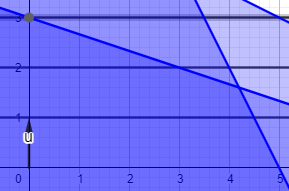

De la gráfica se observa que solo tiene una única solución no degenerada por lo que el modelo dual tendrá una única solución no degenerada.

In [84]:
A_dual = [[1, 1 / 3, 2, -1, 0],
          [2.0, 1.0, 1, 0, -1]]

b_dual = [0, 1]

c_dual = [-11, -3, -10, 0, 0]
basic_indices = [2, 3]
tableau = build_tableau(A_dual, b_dual, c_dual)
print(tableau)
correct_all_tableau(tableau, basic_indices)
simplex(tableau, basic_indices);


[[-11.          -3.         -10.           0.           0.           0.        ]
 [  1.           0.33333333   2.          -1.           0.           0.        ]
 [  2.           1.           1.           0.          -1.           1.        ]]
All tableau corrected
vertex = [0. 0. 1. 2. 0.], x_B = [3, 4]
[[  9.           7.           0.           0.         -10.          10.        ]
 [  2.           1.           1.           0.          -1.           1.        ]
 [  3.           1.66666667   0.           1.          -2.           2.        ]]
vertex = [0.5 0.  0.  0.5 0. ], x_B = [1, 4]
[[ 0.          2.5        -4.5         0.         -5.5         5.5       ]
 [ 1.          0.5         0.5         0.         -0.5         0.5       ]
 [ 0.          0.16666667 -1.5         1.         -0.5         0.5       ]]
vertex = [0.         1.         0.         0.33333333 0.        ], x_B = [2, 4]
[[-5.          0.         -7.          0.         -3.          3.        ]
 [ 2.          1.       

En efecto, se obtuvo una única solución no degenerada.

#### (c)

In [85]:
A = [[1, 1, 1, 0, 0],
     [1, 0, 0, 1, 0],
     [3, 1, 0, 0, 1]]

b = [6, 3., 12]

c = [2, 2, 0, 0, 0]
basic_indices = [2, 3, 4]
tableau = build_tableau(A, b, c)
simplex(tableau, basic_indices);

vertex = [ 0.  0.  6.  3. 12.], x_B = [3, 4, 5]
[[ 2.  2.  0.  0.  0.  0.]
 [ 1.  1.  1.  0.  0.  6.]
 [ 1.  0.  0.  1.  0.  3.]
 [ 3.  1.  0.  0.  1. 12.]]
vertex = [3. 0. 3. 0. 3.], x_B = [3, 1, 5]
[[ 0.  2.  0. -2.  0. -6.]
 [ 0.  1.  1. -1.  0.  3.]
 [ 1.  0.  0.  1.  0.  3.]
 [ 0.  1.  0. -3.  1.  3.]]
vertex = [3. 3. 0. 0. 0.], x_B = [2, 1, 5]
[[  0.   0.  -2.   0.   0. -12.]
 [  0.   1.   1.  -1.   0.   3.]
 [  1.   0.   0.   1.   0.   3.]
 [  0.   0.  -1.  -2.   1.   0.]]


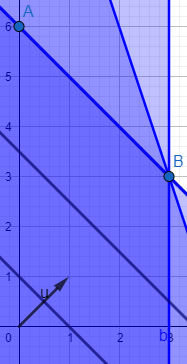

Se observa de la tabla simplex y la gráfica que hay múltiples soluciones formadas por la recta A, B y el punto B es una solución degenerada.

In [87]:
# cambiando de punto
tableau2 = tableau.copy()
print(tableau2)
pivoting(tableau2, 2, 3)
print(tableau2)


[[  0.   0.  -2.   0.   0. -12.]
 [  0.   1.   1.  -1.   0.   3.]
 [  1.   0.   0.   1.   0.   3.]
 [  0.   0.  -1.  -2.   1.   0.]]
[[  0.   0.  -2.   0.   0. -12.]
 [  1.   1.   1.   0.   0.   6.]
 [  1.   0.   0.   1.   0.   3.]
 [  2.   0.  -1.   0.   1.   6.]]


Luego de cambiar de vértice, este es no degenerado. 

In [106]:
A_dual = [[1, 1, 3, -1, 0],
          [1, 0, 1, 0, -1]]
b_dual = [2, 2]
c_dual = [-6, -3, -12., 0, 0]  # -max = min
basic_indices = [0, 4]
tableau = build_tableau(A_dual, b_dual, c_dual)
print(tableau)
correct_all_tableau(tableau, basic_indices)
simplex(tableau, basic_indices);


[[ -6.  -3. -12.   0.   0.   0.]
 [  1.   1.   3.  -1.   0.   2.]
 [  1.   0.   1.   0.  -1.   2.]]
All tableau corrected
vertex = [ 2.  0.  0.  0. -0.], x_B = [1, 5]
[[ 0.  3.  6. -6.  0. 12.]
 [ 1.  1.  3. -1.  0.  2.]
 [-0.  1.  2. -1.  1. -0.]]
vertex = [ 2.  0. -0.  0.  0.], x_B = [1, 3]
[[ 0.   0.   0.  -3.  -3.  12. ]
 [ 1.  -0.5  0.   0.5 -1.5  2. ]
 [-0.   0.5  1.  -0.5  0.5 -0. ]]


In [108]:
# dual algorithm
A_dual = [[-1, -1, -3, 1, 0],
          [-1, 0, -1, 0., 1]]
b_dual = [-2, -2]
c_dual = [-6, -3, -12., 0, 0]  # -max = min
basic_indices = [3, 4]
tableau = build_tableau(A_dual, b_dual, c_dual)
dual_simplex(tableau, basic_indices);


vertex = [ 0.  0.  0. -2. -2.], x_B = [4, 5]
[[ -6.  -3. -12.   0.   0.   0.]
 [ -1.  -1.  -3.   1.   0.  -2.]
 [ -1.   0.  -1.   0.   1.  -2.]]
vertex = [ 0.  2.  0.  0. -2.], x_B = [2, 5]
[[-3.  0. -3. -3.  0.  6.]
 [ 1.  1.  3. -1. -0.  2.]
 [-1.  0. -1.  0.  1. -2.]]
vertex = [2. 0. 0. 0. 0.], x_B = [2, 1]
[[ 0.  0.  0. -3. -3. 12.]
 [ 0.  1.  2. -1.  1.  0.]
 [ 1. -0.  1. -0. -1.  2.]]


#### Exercise 5.8.10. Consider the following model:


#### (a) Determine optimal primal and dual solutions. Draw and analyze the perturbation function for the objective coefficient of $x_4$

In [114]:
A = [[2.0, 2.0, 0., 0., 1, 0, 0, 0, 0],
     [0.0, 0.0, 24, 24, 0, 1, 0, 0, 0],
     [30, 35, 120, 125, 0, 0, 1, 0, 0],
     [135., 0, 135., 0, 0, 0, 0, 1, 0],
     [30., 30., 30, 30, 0, 0, 0, 0, 1]]

b = [600, 300, 3375, 2250, 2250]

c = [620, 520, 720, 620, 0, 0, 0, 0, 0]
basic_indices = [4, 5, 6, 7, 8]
tableau = build_tableau(A, b, c)

simplex(tableau, basic_indices);


vertex = [   0.    0.    0.    0.  600.  300. 3375. 2250. 2250.], x_B = [5, 6, 7, 8, 9]
[[ 620.  520.  720.  620.    0.    0.    0.    0.    0.    0.]
 [   2.    2.    0.    0.    1.    0.    0.    0.    0.  600.]
 [   0.    0.   24.   24.    0.    1.    0.    0.    0.  300.]
 [  30.   35.  120.  125.    0.    0.    1.    0.    0. 3375.]
 [ 135.    0.  135.    0.    0.    0.    0.    1.    0. 2250.]
 [  30.   30.   30.   30.    0.    0.    0.    0.    1. 2250.]]
vertex = [   0.     0.    12.5    0.   600.     0.  1875.   562.5 1875. ], x_B = [5, 3, 7, 8, 9]
[[  620.           520.             0.          -100.             0.           -30.             0.             0.             0.         -9000.        ]
 [    2.             2.             0.             0.             1.             0.             0.             0.             0.           600.        ]
 [    0.             0.             1.             1.             0.             0.04166667     0.             0.             0.  

Tiene múltiples soluciones porque la columna 3 es 0, para obtener otro vértice se pivoteará con la fila 2 (minimum-test-ratio) 

In [118]:
# cambiando de punto
tableau2 = tableau.copy()
print(tableau2)
pivoting(tableau2, 2, 3)
print(tableau2)


[[     0.              0.              0.              0.              0.              0.             -1.11111111     -0.781893      -16.03703704 -41592.59259259]
 [     0.              0.              0.              0.              1.              0.              0.02222222      0.00082305     -0.09259259    468.51851852]
 [     0.              0.              1.              1.              0.              0.              0.01111111      0.00041152     -0.01296296      9.25925926]
 [     0.              1.              0.              1.              0.              0.              0.             -0.00740741      0.03333333     58.33333333]
 [     1.              0.              0.             -1.              0.              0.             -0.01111111      0.00699588      0.01296296      7.40740741]
 [     0.              0.              0.              0.              0.              1.             -0.26666667     -0.00987654      0.31111111     77.77777778]]
[[     0.            

## Práctica Dirigida 6


#### 2. Sea la función $f : \mathbb{R} \rightarrow \mathbb{R}$ definida como

\begin{align*}
f(\delta) :=\max &(1 + \delta)x_1 + x_2&\\
\text{s.t.}\quad    2x_1 + &x_2 \le 8\\
                    3x_1 + &x_2 \le 10\\
                    &x_2 \le 5\\
                    x_1 \ge 0, &x_2 \ge 0
\end{align*}


a) Determinar f en un intervalo conteniendo 0, apartir de la información de la tabla simplex optimal.

In [27]:
# Hallando la tabla óptima
A = np.array([[2, 1., 1, 0, 0],
              [3, 1., 0, 1, 0],
              [0, 1., 0, 0, 1]])

b = [8, 10., 5]

c = np.array([1, 1.0, 0, 0, 0])

basic_var = [2, 3, 4]

tableau = build_tableau(A, b, c)

simplex(tableau, basic_var);


vertex = [ 0.  0.  8. 10.  5.], x_B = [3, 4, 5]
[[ 1.  1.  0.  0.  0.  0.]
 [ 2.  1.  1.  0.  0.  8.]
 [ 3.  1.  0.  1.  0. 10.]
 [ 0.  1.  0.  0.  1.  5.]]
vertex = [3.33333333 0.         1.33333333 0.         5.        ], x_B = [3, 1, 5]
[[ 0.          0.66666667  0.         -0.33333333  0.         -3.33333333]
 [ 0.          0.33333333  1.         -0.66666667  0.          1.33333333]
 [ 1.          0.33333333  0.          0.33333333  0.          3.33333333]
 [ 0.          1.          0.          0.          1.          5.        ]]
vertex = [2. 4. 0. 0. 1.], x_B = [2, 1, 5]
[[ 0.  0. -2.  1.  0. -6.]
 [ 0.  1.  3. -2.  0.  4.]
 [ 1.  0. -1.  1.  0.  2.]
 [ 0.  0. -3.  2.  1.  1.]]
vertex = [1.5 5.  0.  0.5 0. ], x_B = [2, 1, 4]
[[ 0.   0.  -0.5  0.  -0.5 -6.5]
 [ 0.   1.   0.   0.   1.   5. ]
 [ 1.   0.   0.5  0.  -0.5  1.5]
 [ 0.   0.  -1.5  1.   0.5  0.5]]


b) Determinar la tabla simplex optimal en el intervalo determinado en a)


In [28]:
# PRIMERA FORMA: tabla optima con los nuevos pesos
tableau = sp.Matrix([[1 + delta, 1, 0, 0., 0, 0],
                    [0., 1., 0., 0., 1., 5.],
                    [1., 0., 0.5, 0., -0.5, 1.5],
                    [0., 0., -1.5, 1., 0.5, 0.5]])
basic_var = [1, 0, 3]

pivoting_symbolic(tableau, 2, 0)
pivoting_symbolic(tableau, 1, 1)

sp.nsimplify(tableau, rational=True)

Matrix([
[0, 0, -\delta/2 - 1/2, 0, \delta/2 - 1/2, -3*\delta/2 - 13/2],
[0, 1,               0, 0,              1,                  5],
[1, 0,             1/2, 0,           -1/2,                3/2],
[0, 0,            -3/2, 1,            1/2,                1/2]])

In [29]:
# SEGUNDA FORMA
non_basic_var = [2, 4]
# B_inv = np.linalg.inv(A[:, basic_var])
# N = A[:, non_basic_var]
B_invxN = tableau[1:, non_basic_var]
# costos perturbados
c = sp.Matrix([1 + delta, 1, 0, 0., 0])
c_BI = c.row(basic_var)
c_NI = c.row(non_basic_var)

range_delta = sp.nsimplify(c_NI.T - c_BI.T @ B_invxN)
range_delta

Matrix([[-\delta/2 - 1/2, \delta/2 - 1/2]])

c) Gráficamente hallar los vértices de la restricción, para luego hallar explicitamente el valor de f

In [30]:
V = sp.Matrix([[0, 0], [0, 5], [3 / 2, 5], [2, 4], [10 / 3, 0]])
cost = sp.Matrix([1 + delta, 1])
sp.nsimplify(V@cost)


Matrix([
[                 0],
[                 5],
[ 3*\delta/2 + 13/2],
[      2*\delta + 6],
[10*\delta/3 + 10/3]])

## Práctica Calificada 5


#### Pregunta 2

\begin{align*}
f(\delta):= \min \quad       &x_1 +(2 + \delta)x_2 - 2x_3\\
            \text{s.t.}\quad   &x_1 + x_2 + x_3 \le 2\\
                        &2x_1 + x_2 + 3x_3 \le 4\\
                        &x_1 + 2x_2 - x_3 \le 2\\
                        &x_1\ge 0, x_2\ge 0, x_3\ge 0
\end{align*}

In [31]:
A = [[1, 1, 1., 1, 0, 0],
     [2, 1, 3., 0, 1, 0],
     [1, 2, -1, 0, 0, 1]]

b = [2, 4, 2.]

c = lambda delta: [1, 2 + delta, -2, 0, 0, 0]
 

$\mathbf v_1^T = (0, 1, 0)$

In [32]:
basic_var = [3, 4, 5]

tableau = build_tableau(A, b, c(0))
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(delta)).T
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)

vertex = [0. 0. 0. 2. 4. 2.], x_B = [4, 5, 6]
[[ 1.  2. -2.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  2.]
 [ 2.  1.  3.  0.  1.  0.  4.]
 [ 1.  2. -1.  0.  0.  1.  2.]]
vertex = [0. 1. 0. 1. 3. 0.], x_B = [4, 5, 2]
[[ 0.   0.  -1.   0.   0.  -1.  -2. ]
 [ 0.5  0.   1.5  1.   0.  -0.5  1. ]
 [ 1.5  0.   3.5  0.   1.  -0.5  3. ]
 [ 0.5  1.  -0.5  0.   0.   0.5  1. ]]


Matrix([
[  1, \delta + 2,   -2,   0,   0,    0,   0],
[0.5,          0,  1.5, 1.0,   0, -0.5, 1.0],
[1.5,          0,  3.5,   0, 1.0, -0.5, 3.0],
[0.5,        1.0, -0.5,   0,   0,  0.5, 1.0]])

Cost corrected


Matrix([
[-\delta/2, 0, \delta/2 - 1, 0, 0, -\delta/2 - 1, -\delta - 2],
[      1/2, 0,          3/2, 1, 0,          -1/2,           1],
[      3/2, 0,          7/2, 0, 1,          -1/2,           3],
[      1/2, 1,         -1/2, 0, 0,           1/2,           1]])

$\mathbf v_2^T = (2, 0, 0)$

In [33]:
basic_var = [3, 4, 5]

tableau = build_tableau(A, b, c(-1/2))
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(-1/2 + delta)).T
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)


vertex = [0. 0. 0. 2. 4. 2.], x_B = [4, 5, 6]
[[ 1.   1.5 -2.   0.   0.   0.   0. ]
 [ 1.   1.   1.   1.   0.   0.   2. ]
 [ 2.   1.   3.   0.   1.   0.   4. ]
 [ 1.   2.  -1.   0.   0.   1.   2. ]]
vertex = [0. 1. 0. 1. 3. 0.], x_B = [4, 5, 2]
[[ 0.25  0.   -1.25  0.    0.   -0.75 -1.5 ]
 [ 0.5   0.    1.5   1.    0.   -0.5   1.  ]
 [ 1.5   0.    3.5   0.    1.   -0.5   3.  ]
 [ 0.5   1.   -0.5   0.    0.    0.5   1.  ]]
vertex = [2. 0. 0. 0. 0. 0.], x_B = [1, 5, 2]
[[ 0.   0.  -2.  -0.5  0.  -0.5 -2. ]
 [ 1.   0.   3.   2.   0.  -1.   2. ]
 [ 0.   0.  -1.  -3.   1.   1.   0. ]
 [ 0.   1.  -2.  -1.   0.   1.   0. ]]


Matrix([
[  1, \delta + 1.5,   -2,    0,   0,    0,   0],
[1.0,            0,  3.0,  2.0,   0, -1.0, 2.0],
[  0,            0, -1.0, -3.0, 1.0,  1.0,   0],
[  0,          1.0, -2.0, -1.0,   0,  1.0,   0]])

Cost corrected


Matrix([
[0, 0, 2*\delta - 2, \delta - 1/2, 0, -\delta - 1/2, -2],
[1, 0,            3,            2, 0,            -1,  2],
[0, 0,           -1,           -3, 1,             1,  0],
[0, 1,           -2,           -1, 0,             1,  0]])

$\mathbf v_2^T = (0, 4/3, 2/3)$

In [34]:
basic_var = [3, 4, 5]

tableau = build_tableau(A, b, c(3))
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(3 + delta)).T
opt_tableau[0, -1] = 0
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
sp.nsimplify(opt_tableau, rational=True)


vertex = [0. 0. 0. 2. 4. 2.], x_B = [4, 5, 6]
[[ 1.  5. -2.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  2.]
 [ 2.  1.  3.  0.  1.  0.  4.]
 [ 1.  2. -1.  0.  0.  1.  2.]]
vertex = [0. 1. 0. 1. 3. 0.], x_B = [4, 5, 2]
[[-1.5  0.   0.5  0.   0.  -2.5 -5. ]
 [ 0.5  0.   1.5  1.   0.  -0.5  1. ]
 [ 1.5  0.   3.5  0.   1.  -0.5  3. ]
 [ 0.5  1.  -0.5  0.   0.   0.5  1. ]]
vertex = [0.         1.33333333 0.66666667 0.         0.66666667 0.        ], x_B = [3, 5, 2]
[[-1.66666667  0.          0.         -0.33333333  0.         -2.33333333 -5.33333333]
 [ 0.33333333  0.          1.          0.66666667  0.         -0.33333333  0.66666667]
 [ 0.33333333  0.          0.         -2.33333333  1.          0.66666667  0.66666667]
 [ 0.66666667  1.          0.          0.33333333  0.          0.33333333  1.33333333]]


Matrix([
[                1, \delta + 5,  -2,                 0,   0,                  0,                 0],
[0.333333333333333,          0, 1.0, 0.666666666666667,   0, -0.333333333333333, 0.666666666666667],
[0.333333333333333,          0,   0, -2.33333333333333, 1.0,  0.666666666666667, 0.666666666666667],
[0.666666666666667,        1.0,   0, 0.333333333333333,   0,  0.333333333333333,  1.33333333333333]])

Cost corrected


Matrix([
[-2*\delta/3 - 5/3, 0, 0, -\delta/3 - 1/3, 0, -\delta/3 - 7/3, -4*\delta/3 - 16/3],
[              1/3, 0, 1,             2/3, 0,            -1/3,                2/3],
[              1/3, 0, 0,            -7/3, 1,             2/3,                2/3],
[              2/3, 1, 0,             1/3, 0,             1/3,                4/3]])

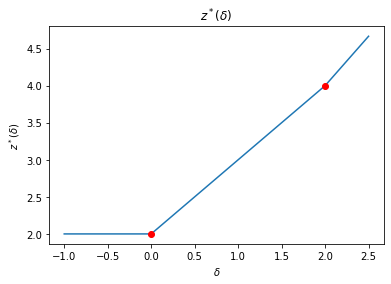

In [35]:
def z(delta):
    if delta < 0:
        return 2
    elif 0 <= delta < 2:
        return delta + 2
    else:
        return 4 / 3 * (delta + 1)


interval_point = [0, 2]
z_point = [z(d) for d in interval_point]

interval = np.linspace(-1, 2.5)
z_plot = [z(d) for d in interval]

plt.title("$z^*(\delta)$")
plt.xlabel("$\delta$")
plt.ylabel("$z^*(\delta)$")
plt.plot(interval, z_plot)
plt.plot(interval_point, z_point, 'o', c='r')
plt.show()


## Práctica Dirigida 7

#### 1. Hallar el gráfico de la función $f:\mathbb{R} \rightarrow \mathbb{R}$ definida como

\begin{align*}
f(\delta) := \max \quad&x_1 + (1 + \delta)x_2 - 3 x_3\\
\quad{s.t.}\quad    &x_1 + x_2 + x_3 \le 2\\
                    &2x_1 + x_2 + 3x_3 \le 4\\
                    &x_1 + 2x_2 - x_3 \le 2\\
                    &x_1 \ge 0, x_2 \ge 0, x_3 \ge 0.
\end{align*}

In [36]:
A = [[1, 1, 1., 1, 0, 0],
     [2, 1, 3., 0, 1, 0],
     [1, 2, -1, 0, 0, 1]]

b = [2, 4, 2.]

c = lambda delta: [1, 1 + delta, -3, 0, 0, 0]


Caso 1: $\delta = 0$

In [37]:
basic_var = [3, 4, 5]

tableau = build_tableau(A, b, c(0))

simplex(tableau, basic_var);

vertex = [0. 0. 0. 2. 4. 2.], x_B = [4, 5, 6]
[[ 1.  1. -3.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  2.]
 [ 2.  1.  3.  0.  1.  0.  4.]
 [ 1.  2. -1.  0.  0.  1.  2.]]
vertex = [2. 0. 0. 0. 0. 0.], x_B = [1, 5, 6]
[[ 0.  0. -4. -1.  0.  0. -2.]
 [ 1.  1.  1.  1.  0.  0.  2.]
 [ 0. -1.  1. -2.  1.  0.  0.]
 [ 0.  1. -2. -1.  0.  1.  0.]]


**Observación:** Dado que hay un costo no básico $(\alpha=1)$ igual a $0$ (Teorema 3.7.2), el modelo tiene soluciones óptimas múltiples. Aplicando el test de mínimo ratio con la columna $\alpha$ se obtiene que $\delta=0$ (solución básica degenerada), por lo que no podemos saltar a otro vértice. Utilizamos otro método para saltar de vértice: Si $(2, 0, 0, 0, 0)$ es una solucion degenerada, con variables básicas $x_1, x_5, x_6$, donde $x_5=x_6=0$, puedo considerar otra variable con valor $0$, $x_2, x_3, x_4$, siempre y cuando $B^{-1}$ exista (invertible). Entonces pivoteamos la tabla óptima anterior para obtener dos tablas con variables básicas $x_1, x_2, x_6$ y $x_1, x_5, x_2$:

In [38]:
# para [x0, x1, x5] empezamos con indice 0 
tableau_1 = np.copy(tableau)
basic_var_1 = np.copy(basic_var)
alpha = 1  # donde el costo es 0 puedo saltar a otros vértices
x_degenerate = 1
pivoting(tableau_1, x_degenerate + 1, alpha)
basic_var_1[x_degenerate] = alpha
print(f"{basic_var_1}\n{tableau_1}")


[0 1 5]
[[ 0.  0. -4. -1.  0.  0. -2.]
 [ 1.  0.  2. -1.  1.  0.  2.]
 [-0.  1. -1.  2. -1. -0. -0.]
 [ 0.  0. -1. -3.  1.  1.  0.]]


In [39]:
# para [x0, x4, x1] empezamos con indice 0 
tableau_2 = np.copy(tableau)
basic_var_2 = np.copy(basic_var)
alpha = 1  # donde el costo es 0 puedo saltar a otros vértices
x_degenerate = 2
pivoting(tableau_2, x_degenerate + 1, alpha)
basic_var_2[x_degenerate] = alpha
print(f"{basic_var_2}\n{tableau_2}")


[0 4 1]
[[ 0.  0. -4. -1.  0.  0. -2.]
 [ 1.  0.  3.  2.  0. -1.  2.]
 [ 0.  0. -1. -3.  1.  1.  0.]
 [ 0.  1. -2. -1.  0.  1.  0.]]


Luego de tener la tabla óptima en ambos casos procedemos a añadir el coeficiente $\delta$ para perturbarlo y corregirlo para hallar los intervalos de tolerancia.

Caso 2: $\delta = 1$

In [40]:
basic_var = [3, 4, 5]

tableau = build_tableau(A, b, c(1))

simplex(tableau, basic_var);

vertex = [0. 0. 0. 2. 4. 2.], x_B = [4, 5, 6]
[[ 1.  2. -3.  0.  0.  0.  0.]
 [ 1.  1.  1.  1.  0.  0.  2.]
 [ 2.  1.  3.  0.  1.  0.  4.]
 [ 1.  2. -1.  0.  0.  1.  2.]]
vertex = [0. 1. 0. 1. 3. 0.], x_B = [4, 5, 2]
[[ 0.   0.  -2.   0.   0.  -1.  -2. ]
 [ 0.5  0.   1.5  1.   0.  -0.5  1. ]
 [ 1.5  0.   3.5  0.   1.  -0.5  3. ]
 [ 0.5  1.  -0.5  0.   0.   0.5  1. ]]


En este caso obtuve otro vértice. Si hubiera salido el vértice anterior utilizo el costo no básico y el test de mínimo ratio para moverme de vértice 

#### 2. Hallar el gráfico de la función $f:\mathbb{R} \rightarrow \mathbb{R}$ definida como

\begin{align*}
f(\delta) := \max \quad&x_1 + x_2 + \delta x_3\\
\quad{s.t.}\quad    &x_1 + x_2 + x_3 \le 1\\
                    &x_1 \ge 0, x_2 \ge 0, x_3 \ge 0.
\end{align*}

In [41]:
A = [[1., 1, 1, 1]]

b = [1.]

c = lambda delta: [1, 1., 0 + delta, 0]


$\mathbf v = (1, 0, 0)$

In [42]:
basic_var = [3]

tableau = build_tableau(A, b, c(0))

print("Simplex process")
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(delta)).T
opt_tableau[0, -1] = 0
print("Perturbation")
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
display(sp.nsimplify(opt_tableau, rational=True))

Simplex process
vertex = [0. 0. 0. 1.], x_B = [4]
[[1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1.]]
vertex = [1. 0. 0. 0.], x_B = [1]
[[ 0.  0. -1. -1. -1.]
 [ 1.  1.  1.  1.  1.]]
Perturbation


Matrix([
[  1, 1.0, \delta,   0,   0],
[1.0, 1.0,    1.0, 1.0, 1.0]])

Cost corrected


Matrix([
[0, 0, \delta - 1, -1, -1],
[1, 1,          1,  1,  1]])

$\mathbf v = (0, 0, 1)$

In [43]:
basic_var = [3]

tableau = build_tableau(A, b, c(2))

print("Simplex process")
opt_tableau = simplex(tableau, basic_var)
opt_tableau = sp.Matrix(opt_tableau.tolist())
opt_tableau[0, :-1] = sp.Matrix(c(2 + delta)).T
opt_tableau[0, -1] = 0
print("Perturbation")
display(opt_tableau)

correct_symbolic_cost(opt_tableau, basic_var)
display(sp.nsimplify(opt_tableau, rational=True))

Simplex process
vertex = [0. 0. 0. 1.], x_B = [4]
[[1. 1. 2. 0. 0.]
 [1. 1. 1. 1. 1.]]
vertex = [0. 0. 1. 0.], x_B = [3]
[[-1. -1.  0. -2. -2.]
 [ 1.  1.  1.  1.  1.]]
Perturbation


Matrix([
[  1, 1.0, \delta + 2,   0,   0],
[1.0, 1.0,        1.0, 1.0, 1.0]])

Cost corrected


Matrix([
[-\delta - 1, -\delta - 1, 0, -\delta - 2, -\delta - 2],
[          1,           1, 1,           1,           1]])

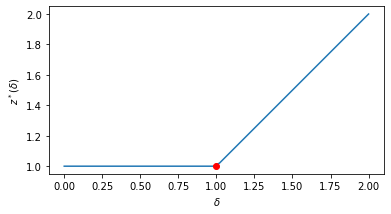

In [44]:
z = lambda delta: 1 if delta < 1 else delta

interval = np.linspace(0, 2)
z_plot = [z(d) for d in interval]

plt.xlabel("$\delta$")
plt.ylabel("$z^*(\delta)$")
plt.plot(interval, z_plot)
plt.plot(1, z(1), 'o', c='r')
plt.axis("scaled")
plt.show()


#### 3. Hallar el gráfico de la función $f:\mathbb{R} \rightarrow \mathbb{R}$ definida como

\begin{align*}
f(\delta) := \max \quad& \delta x_3\\
\text{s.t.}\quad   &x_1  \le 1\\
            &x_2  \le 1\\
&x_1 \ge 0, x_2 \ge 0, x_3 \ge 0.
\end{align*}
*Solution*

$f(\delta) = 0 \text{ if } \delta \le 0 \text{ else } \infty $